<a href="https://colab.research.google.com/github/2403a52029-lab/NLP_LAB-ASSIGNMENTS/blob/main/NLP_Lab_11_J_NithinPatil_2403A52029_B_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling libraries
import pandas as pd
import numpy as np

# Text preprocessing libraries
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model building
from sklearn.naive_bayes import MultinomialNB

# Train-test split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# Load dataset (change path if needed)
df = pd.read_csv("/content/news.csv", encoding='latin-1')

# The error 'ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements'
# occurs because the DataFrame 'df' has 4 columns after reading 'news.csv',
# but the code attempts to assign only 2 new names (["label", "message"]) to these 4 columns.
#
# To fix this, we need to select only the relevant columns (the text content and its label)
# and then rename them to "label" and "message".
#
# Based on common structures for 'news.csv' and the available DataFrame preview (Unnamed: 0, title, and 2 others),
# we assume the columns are roughly 'id', 'title', 'text_content', 'label_category'.
# We will select the label category and text content columns.

# Try to select columns by their common names first.
try:
    # Assuming the loaded DataFrame has columns named 'label' and 'text'.
    df = df[['label', 'text']]
    # Rename the 'text' column to 'message'
    df.rename(columns={'text': 'message'}, inplace=True)
except KeyError:
    # If 'label' or 'text' are not the actual column names,
    # we infer them by position based on the "4 elements" error and common CSV structure.
    # It is highly probable that the 4 columns are: id, title, text, label (even if unnamed).
    # So, 'text' would be at index 2 and 'label' at index 3.
    print("Warning: 'label' or 'text' column not found. Attempting to infer by column index.")
    if len(df.columns) == 4:
        # Select the column at index 3 (label) and index 2 (text content)
        # The order is chosen to match the desired `["label", "message"]` after selection.
        df = df[[df.columns[3], df.columns[2]]]
        # Assign new names: 'label' to the former index 3, 'message' to the former index 2
        df.columns = ["label", "message"]
        print("Inferred columns by index: df.columns[3] as 'label', df.columns[2] as 'message'.")
    else:
        # If not 4 columns, or a different structure, raise an error for manual inspection.
        raise ValueError("Could not automatically identify 'label' and 'message' columns. Please inspect your 'news.csv' file and adjust column selection.")


# Display first 5 rows
print(df.head())

# Dataset size
print("Dataset Shape:", df.shape)

# Class distribution
print("Class Distribution:")
print(df["label"].value_counts())


  label                                            message
0  FAKE  Daniel Greenfield, a Shillman Journalism Fello...
1  FAKE  Google Pinterest Digg Linkedin Reddit Stumbleu...
2  REAL  U.S. Secretary of State John F. Kerry said Mon...
3  FAKE  â Kaydee King (@KaydeeKing) November 9, 2016...
4  REAL  It's primary day in New York and front-runners...
Dataset Shape: (6335, 2)
Class Distribution:
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    return " ".join(words)

# Apply preprocessing
df["cleaned_message"] = df["message"].apply(preprocess_text)

print(df.head())


  label                                            message  \
0  FAKE  Daniel Greenfield, a Shillman Journalism Fello...   
1  FAKE  Google Pinterest Digg Linkedin Reddit Stumbleu...   
2  REAL  U.S. Secretary of State John F. Kerry said Mon...   
3  FAKE  â Kaydee King (@KaydeeKing) November 9, 2016...   
4  REAL  It's primary day in New York and front-runners...   

                                     cleaned_message  
0  daniel greenfield shillman journalism fellow f...  
1  google pinterest digg linkedin reddit stumbleu...  
2  secretary state john f kerry said monday stop ...  
3  â kaydee king kaydeeking november lesson ton...  
4  primary day new york frontrunners hillary clin...  


In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Convert text into numerical features
X = vectorizer.fit_transform(df["cleaned_message"])

# Target labels
y = df["label"]

# Feature matrix shape
print("Feature Matrix Shape:", X.shape)

# Display first 10 feature names
print("Sample Features:", vectorizer.get_feature_names_out()[:10])


Feature Matrix Shape: (6335, 90569)
Sample Features: ['aa' 'aaa' 'aaaa' 'aaaaadd' 'aaaasetlayoutnew' 'aaas' 'aab' 'aachen'
 'aachenâ' 'aadhar']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (5068, 90569)
Testing size: (1267, 90569)


In [ ]:
# Initialize model
model = MultinomialNB()

# Train model
model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Target
y = df['label']

# Train Test Split (use original text, not over-cleaned text)
X_train, X_test, y_train, y_test = train_test_split(
    df['message'],
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Stronger TF-IDF
vectorizer = TfidfVectorizer(
    max_features=90000000,          # Better than 200000 (removes noise)
    ngram_range=(1,2),           # Unigrams + Bigrams
    stop_words='english',
    sublinear_tf=True,           # Improves performance
    min_df=2                     # Remove very rare words
)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Tuned Naive Bayes
model = MultinomialNB(alpha=0.05)   # Lower alpha often improves accuracy
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="FAKE")
recall = recall_score(y_test, y_pred, pos_label="FAKE")
f1 = f1_score(y_test, y_pred, pos_label="FAKE")
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9321231254932912
Precision: 0.9691252144082333
Recall: 0.8925750394944708
F1-Score: 0.9292763157894737

Confusion Matrix:
 [[565  68]
 [ 18 616]]

Classification Report:

              precision    recall  f1-score   support

        FAKE       0.97      0.89      0.93       633
        REAL       0.90      0.97      0.93       634

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



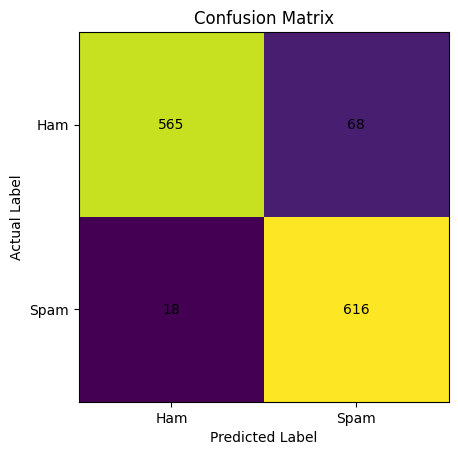

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix already calculated as 'cm'
# If not, uncomment below:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

plt.figure()

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Add numbers inside boxes
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xticks([0,1], ["Ham", "Spam"])
plt.yticks([0,1], ["Ham", "Spam"])

plt.show()
